In [189]:
!pip install statsmodels

<p style="font-family: Arial; font-size:2.75em;color:black; font-style:bold"><br>
Modelo de estimacion VAR(P) IBR - TES </p><br>

En este documento se desarrollara el paso a paso y las pruebas con el fin de determinar la estimacion de la IBR - TES

Modelo: VAR (P)

**disclaimer: este procedimiento es un ejercicio de carácter analítico con el único fin de mostrar el procedimiento de un VAR(P) en el impacto de un portafolio determinado, con el fin de cumplir una prueba practica**

In [363]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
#from intertools import product
#from tqdm import tqdm_notebook
from scipy.stats import norm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.stattools import jarque_bera

import warnings
warnings.filterwarnings('ignore')


<p style="font-family: Arial; font-size:1.25em;color:black; font-style:bold"><br>
Importar informacion, se encuentra en excel:
    
- Curvas IBR
- Curvas TES
- Portafolio
</p>

In [364]:
Curvas_IBR = pd.read_excel(r'C:\Users\jmrojas\Desktop\Entregable\Documentos Base\Curvas.xlsx',sheet_name= 'Curva IBR')
Curvas_TES = pd.read_excel(r'C:\Users\jmrojas\Desktop\Entregable\Documentos Base\Curvas.xlsx',sheet_name= 'Curva TES COP')
Portafolio = pd.read_excel(r'C:\Users\jmrojas\Desktop\Entregable\Documentos Base\Portafolio.xlsx',sheet_name= 'Hoja1')

Curvas_IBR.tail(10)

,Row,1,30,90,180,270,360,548,732,1099,...,1828,2193,2559,2926,3290,3654,4385,5481,7308,9135
1448,2022-01-18,0.02967,0.034221,0.038236,0.047690,0.054328,0.060342,0.066895,0.071508,0.077172,...,0.087273,0.092279,0.097611,0.103194,0.108499,0.115208,0.128426,0.148638,0.213861,0.276777
1449,2022-01-19,0.02944,0.034387,0.038211,0.047360,0.054277,0.059944,0.066356,0.070691,0.076723,...,0.086617,0.091477,0.097052,0.102341,0.108409,0.114088,0.128204,0.148256,0.213128,0.275548
1450,2022-01-20,0.02952,0.034650,0.038881,0.047246,0.053664,0.059392,0.065855,0.069950,0.075615,...,0.085687,0.090039,0.095241,0.101239,0.106334,0.113236,0.125843,0.145916,0.209092,0.269551
1451,2022-01-21,0.02937,0.035164,0.038813,0.047368,0.053070,0.058648,0.065010,0.068450,0.073996,...,0.083738,0.087894,0.092858,0.098578,0.103405,0.109913,0.123088,0.142333,0.203032,0.260443
1452,2022-01-24,0.02932,0.035718,0.039549,0.048001,0.053611,0.059047,0.065628,0.069469,0.075139,...,0.084587,0.089287,0.094249,0.099868,0.105166,0.111703,0.124371,0.143993,0.205890,0.264839
1453,2022-01-25,0.02928,0.035940,0.039578,0.048001,0.052906,0.058569,0.065010,0.068797,0.074791,...,0.083638,0.088635,0.094078,0.098878,0.104900,0.110949,0.122790,0.141769,0.202207,0.259536
1454,2022-01-26,0.02930,0.036257,0.039578,0.047734,0.052985,0.058401,0.065199,0.069052,0.074154,...,0.083372,0.087884,0.092950,0.097908,0.103595,0.109543,0.122125,0.140590,0.200200,0.256523
1455,2022-01-27,0.02929,0.036703,0.040312,0.049074,0.054370,0.059736,0.066598,0.070909,0.075865,...,0.084828,0.089688,0.094809,0.099783,0.104822,0.111147,0.122928,0.141785,0.202449,0.260089
1456,2022-01-28,0.02930,0.036617,0.039988,0.048785,0.054449,0.059815,0.066688,0.071029,0.075443,...,0.084524,0.089114,0.093918,0.100053,0.105057,0.111383,0.123140,0.142036,0.202813,0.260468
1457,2022-01-31,0.03875,0.038851,0.042358,0.051095,0.056532,0.061290,0.067360,0.070445,0.075288,...,0.082778,0.087465,0.092410,0.097145,0.101471,0.107426,0.118516,0.136145,0.193095,0.246536


In [365]:
Curvas_TES.tail(10)

,Row,N1,N7,N15,N30,N60,N90,N120,N150,N180,...,N3240,N3600,N4320,N5400,N6120,N7200,N8280,N9000,N10800,N12600
3926,2022-01-18,0.030653,0.031196,0.031911,0.033228,0.035771,0.038197,0.040511,0.042721,0.044829,...,0.094203,0.094997,0.096183,0.097365,0.097921,0.098546,0.099009,0.099255,0.099728,0.099728
3927,2022-01-19,0.030935,0.031458,0.032147,0.033417,0.035872,0.038217,0.040458,0.042600,0.044647,...,0.094095,0.094935,0.096190,0.097442,0.098031,0.098693,0.099183,0.099444,0.099946,0.099946
3928,2022-01-20,0.030928,0.031420,0.032070,0.033267,0.035585,0.037803,0.039928,0.041962,0.043910,...,0.092994,0.093881,0.095209,0.096533,0.097156,0.097857,0.098376,0.098653,0.099183,0.099183
3929,2022-01-21,0.031272,0.031731,0.032338,0.033458,0.035628,0.037709,0.039706,0.041621,0.043458,...,0.091579,0.092499,0.093876,0.095252,0.095899,0.096627,0.097165,0.097452,0.098003,0.098003
3930,2022-01-24,0.031398,0.031879,0.032514,0.033685,0.035952,0.038122,0.040201,0.042191,0.044098,...,0.092698,0.093607,0.094969,0.096331,0.096972,0.097694,0.098227,0.098512,0.099058,0.099058
3931,2022-01-25,0.031116,0.031597,0.032233,0.033405,0.035675,0.037848,0.039930,0.041924,0.043835,...,0.092861,0.093793,0.095191,0.096590,0.097248,0.097989,0.098537,0.098830,0.099390,0.099390
3932,2022-01-26,0.031243,0.031726,0.032362,0.033536,0.035807,0.037980,0.040059,0.042048,0.043953,...,0.092132,0.093038,0.094396,0.095756,0.096396,0.097116,0.097649,0.097933,0.098478,0.098478
3933,2022-01-27,0.031865,0.032369,0.033034,0.034258,0.036623,0.038880,0.041034,0.043091,0.045056,...,0.092737,0.093595,0.094883,0.096172,0.096779,0.097462,0.097967,0.098237,0.098754,0.098754
3934,2022-01-28,0.032662,0.033179,0.033861,0.035116,0.037536,0.039841,0.042037,0.044130,0.046124,...,0.092950,0.093764,0.094987,0.096211,0.096787,0.097436,0.097916,0.098172,0.098662,0.098662
3935,2022-01-31,0.033499,0.034024,0.034716,0.035988,0.038437,0.040765,0.042977,0.045081,0.047081,...,0.092428,0.093188,0.094330,0.095472,0.096010,0.096616,0.097064,0.097303,0.097761,0.097761


<p style="font-family: Arial; font-size:1.25em;color:black; font-style:bold"><br>
Informacion a analizar:
</p>

Se toma como referencia la tasa al vencimiento del TES 24 del portafolio, en ese caso seria N720 y la relacion de la tasa IBR N732 correspondiente al vencimiento del TES 24

In [366]:
Curva_720 = Curvas_TES[['Row','N720']]
Curva_720

,Row,N720
0,2007-01-01,0.083425
1,2007-01-02,0.083105
2,2007-01-03,0.082812
3,2007-01-04,0.083675
4,2007-01-05,0.084469
...,...,...
3931,2022-01-25,0.067519
3932,2022-01-26,0.067409
3933,2022-01-27,0.068811
3934,2022-01-28,0.069880


In [367]:
Curva_732IBR = Curvas_IBR[['Row',732]]
Curva_732IBR.columns = ['Row','N732']
Curva_732IBR

,Row,N732
0,2016-06-30,0.067687
1,2016-07-01,0.068493
2,2016-07-04,0.068493
3,2016-07-05,0.068832
4,2016-07-06,0.069725
...,...,...
1453,2022-01-25,0.068797
1454,2022-01-26,0.069052
1455,2022-01-27,0.070909
1456,2022-01-28,0.071029


<p style="font-family: Arial; font-size:1.25em;color:black; font-style:bold"><br>
Se construye Dataframe:
</p>

- Esto con el fin de realizar la estimacion bajo el modelo VAR(P)

- Se construye la grafica, para visualizar relacion y posible estacionereidad de las variables

- Sin embargo se realizaran las pruebas correspondientes de ADF para validar la estacioneridad


In [368]:
Data = Curva_720.merge(Curva_732IBR, on='Row', how='inner')
Data.tail(6)

,Row,N720,N732
1452,2022-01-24,0.067691,0.069469
1453,2022-01-25,0.067519,0.068797
1454,2022-01-26,0.067409,0.069052
1455,2022-01-27,0.068811,0.070909
1456,2022-01-28,0.069880,0.071029
1457,2022-01-31,0.070528,0.070445


<AxesSubplot:xlabel='Row'>

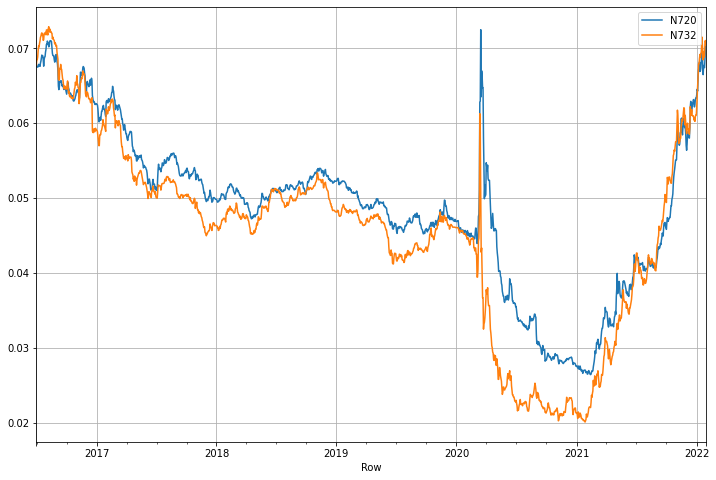

In [369]:
Data.plot(x='Row', y=['N720', 'N732'], figsize=(12,8), grid=True)

In [370]:
#Prueba ADF N720

from statsmodels.tsa.stattools import adfuller

result = adfuller(Data['N720'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.498020
p-value: 0.534490
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [371]:
#Prueba ADF N732

from statsmodels.tsa.stattools import adfuller

result = adfuller(Data['N732'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.416706
p-value: 0.574241
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


En los P - Valores se evidencian no estacioneridad, por lo que se procede a realizar la primera diferencia de las varibles y validar nuevamente con la prueba de ADF

In [372]:
Data.set_index('Row',inplace = True)

In [373]:
DifDATA = Data.pct_change()
DifDATA = DifDATA.dropna()
DifDATA

,N720,N732
Row,,
2016-07-01,-0.004932,0.011902
2016-07-04,0.000000,0.000000
2016-07-05,-0.000739,0.004950
2016-07-06,0.001334,0.012974
2016-07-07,0.004200,0.008191
...,...,...
2022-01-25,-0.002541,-0.009672
2022-01-26,-0.001629,0.003702
2022-01-27,0.020798,0.026899


In [374]:
#Prueba ADF D720

from statsmodels.tsa.stattools import adfuller

result = adfuller(DifDATA['N720'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.456994
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [375]:
#Prueba ADF D720

from statsmodels.tsa.stattools import adfuller

result = adfuller(DifDATA['N732'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.187203
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


En los P - Valores se evidencian la estacioneridad, por lo que se procede a realizar la prueba de Causalidad de Granger:

- Se evidencia que en los P-Valores estan dentro del intervalo de confianza, continuamos con el modelo

In [376]:
grangercausalitytests(DifDATA[['N720', 'N732']], maxlag=[2])
grangercausalitytests(DifDATA[['N732', 'N720']], maxlag=[2])


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=47.1496 , p=0.0000  , df_denom=1450, df_num=2
ssr based chi2 test:   chi2=94.6244 , p=0.0000  , df=2
likelihood ratio test: chi2=91.6747 , p=0.0000  , df=2
parameter F test:         F=47.1496 , p=0.0000  , df_denom=1450, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=17.7028 , p=0.0000  , df_denom=1450, df_num=2
ssr based chi2 test:   chi2=35.5276 , p=0.0000  , df=2
likelihood ratio test: chi2=35.1008 , p=0.0000  , df=2
parameter F test:         F=17.7028 , p=0.0000  , df_denom=1450, df_num=2


{2: ({'ssr_ftest': (17.702766354678587, 2.5360023216491203e-08, 1450.0, 2),
   'ssr_chi2test': (35.527620753182546, 1.928746610544753e-08, 2),
   'lrtest': (35.1008049065058, 2.3875752010518483e-08, 2),
   'params_ftest': (17.702766354678612, 2.5360023216491203e-08, 1450.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [377]:
DifDATA = DifDATA.reset_index(level=0)
DifDATA

,Row,N720,N732
0,2016-07-01,-0.004932,0.011902
1,2016-07-04,0.000000,0.000000
2,2016-07-05,-0.000739,0.004950
3,2016-07-06,0.001334,0.012974
4,2016-07-07,0.004200,0.008191
...,...,...,...
1452,2022-01-25,-0.002541,-0.009672
1453,2022-01-26,-0.001629,0.003702
1454,2022-01-27,0.020798,0.026899
1455,2022-01-28,0.015535,0.001681


<AxesSubplot:xlabel='Row'>

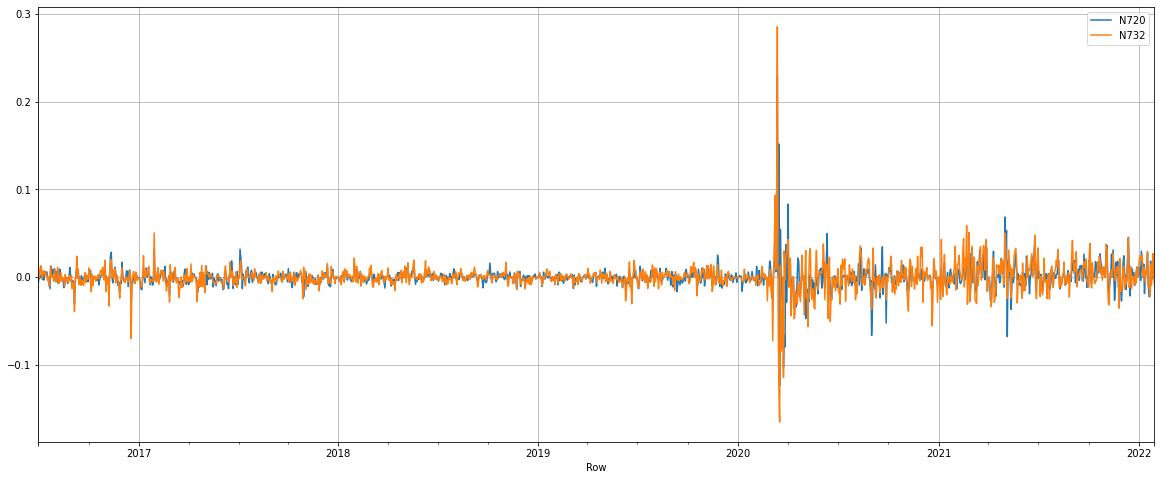

In [378]:
DifDATA.plot(x='Row', y=['N720', 'N732'], figsize=(20,8), grid=True)

In [379]:
DifDATA.set_index('Row',inplace = True)

In [380]:
DifDATA

,N720,N732
Row,,
2016-07-01,-0.004932,0.011902
2016-07-04,0.000000,0.000000
2016-07-05,-0.000739,0.004950
2016-07-06,0.001334,0.012974
2016-07-07,0.004200,0.008191
...,...,...
2022-01-25,-0.002541,-0.009672
2022-01-26,-0.001629,0.003702
2022-01-27,0.020798,0.026899


Se realiza el modelo VAR(P) con Lag hasta 5 con el fin de evaluar el mejor Lag que explique el modelo en base al AIC y BIC menor

- El Lag mejor es 5

In [381]:
model = VAR(DifDATA)
for i in [1,2,3,4,5]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -17.398074195238983
BIC :  -17.376301743746854
FPE :  2.7804326925036215e-08
HQIC:  -17.389951081987356 

Lag Order = 2
AIC :  -17.522010552195653
BIC :  -17.48570291522242
FPE :  2.4563346173773267e-08
HQIC:  -17.50846402197968 

Lag Order = 3
AIC :  -17.539880277888187
BIC :  -17.48902124679238
FPE :  2.4128306813913874e-08
HQIC:  -17.52090391020304 

Lag Order = 4
AIC :  -17.565605764825456
BIC :  -17.500179101408897
FPE :  2.3515514363157787e-08
HQIC:  -17.541193127131056 

Lag Order = 5
AIC :  -17.589623336617535
BIC :  -17.5096127730511
FPE :  2.2957463257962743e-08
HQIC:  -17.559767984307843 



In [382]:
x = model.select_order(maxlags=5)
x.summary()

,AIC,BIC,FPE,HQIC
0,-17.31,-17.30,3.040e-08,-17.31
1,-17.39,-17.37,2.794e-08,-17.39
2,-17.52,-17.48,2.465e-08,-17.51
3,-17.54,-17.49,2.419e-08,-17.52
4,-17.56,-17.50,2.355e-08,-17.54
5,-17.59*,-17.51*,2.296e-08*,-17.56*


In [383]:
DifDATA.tail(5)

,N720,N732
Row,,
2022-01-25,-0.002541,-0.009672
2022-01-26,-0.001629,0.003702
2022-01-27,0.020798,0.026899
2022-01-28,0.015535,0.001681
2022-01-31,0.009273,-0.008219


Continuamos con la regresion del modelos, lag 5

In [384]:
model_fitted = model.fit(5)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 18, Apr, 2022
Time:                     15:06:51
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -17.5096
Nobs:                     1452.00    HQIC:                  -17.5598
Log likelihood:           8671.47    FPE:                2.29575e-08
AIC:                     -17.5896    Det(Omega_mle):     2.26135e-08
--------------------------------------------------------------------
Results for equation N720
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.000047         0.000330            0.141           0.888
L1.N720        -0.082619         0.033574           -2.461           0.014
L1.N732         0.205663         0.027501            7.478           0.000
L2.N720   

Pruebas del Modelo de ACF de los Residuales

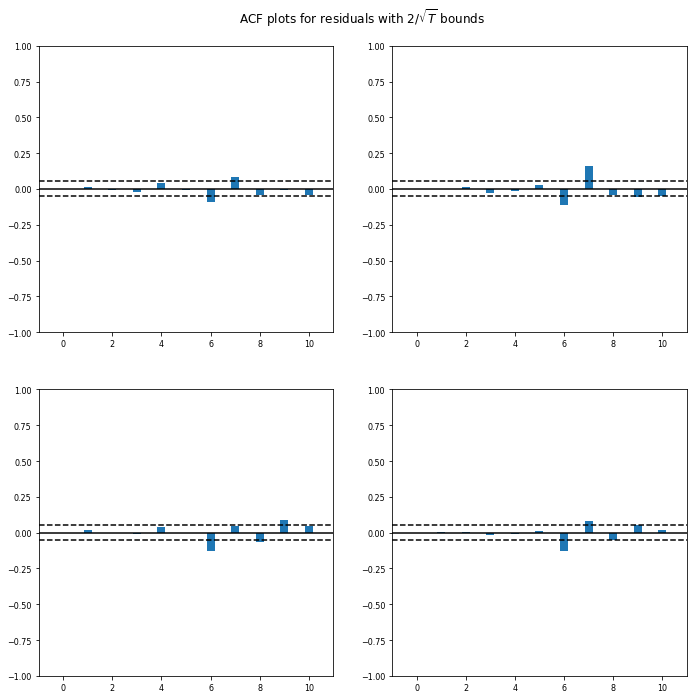

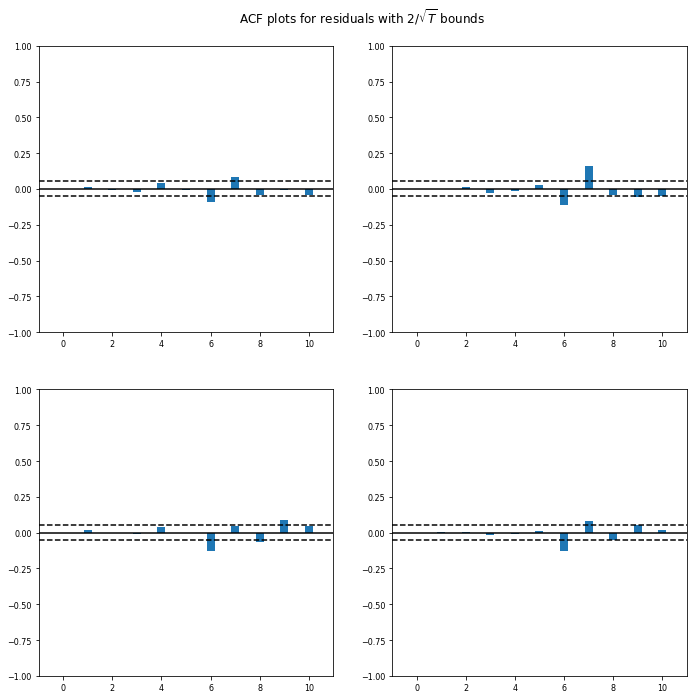

In [385]:
model_fitted.plot_acorr()

Se realiza la prueba de Durbin Watson

- Se evidencia que estan cercanos a 2, continuamos con el modelo

In [386]:
out = durbin_watson(model_fitted.resid)
out

array([1.97561493, 1.99101003])

<p style="font-family: Arial; font-size:1.25em;color:black; font-style:bold"><br>
Impulso Respuesta
</p>

Se realiza la funcion de impuslo respuesta, esto con el fin de derminar un impulso en la variable N732 - IBR y la respuesta en la tasa TES N720

In [387]:
lag_order = model_fitted.k_ar

In [388]:
irf = model_fitted.irf(5)

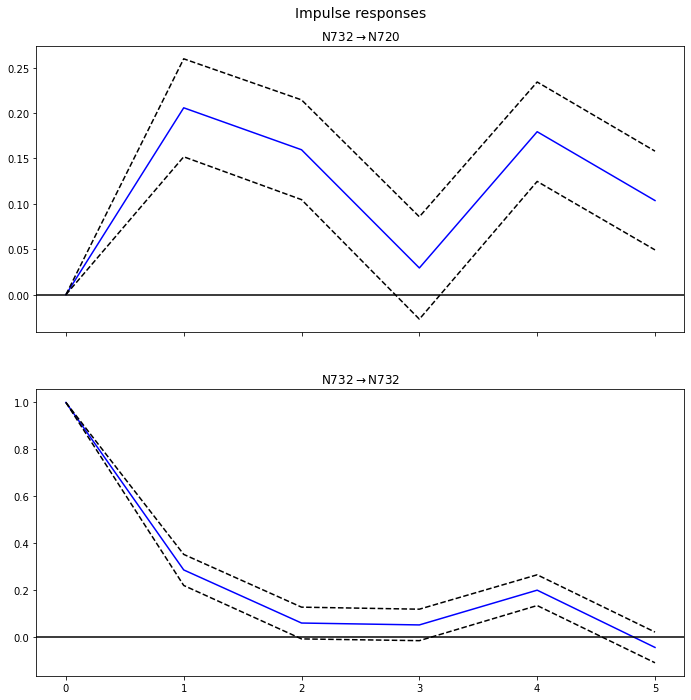

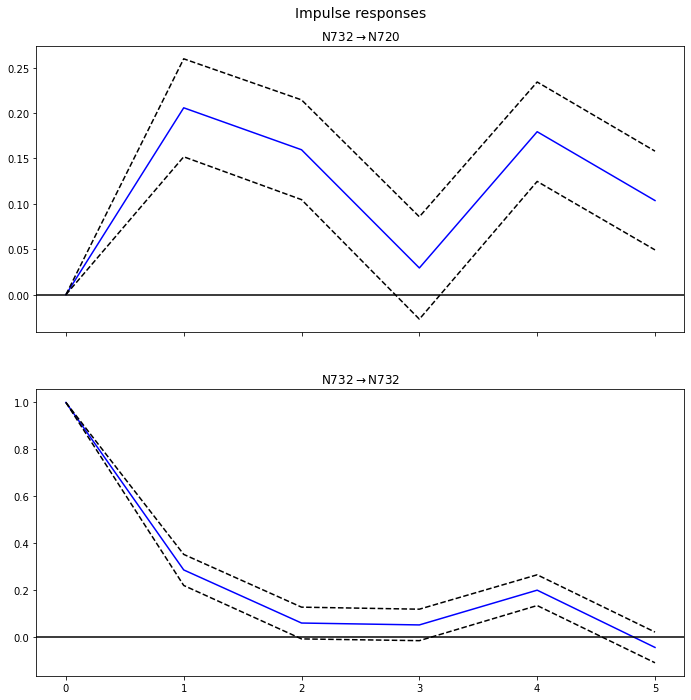

In [389]:
irf.plot(impulse='N732')

*Prueba Jarque Vera y Test Normalidad

- Se evidencia que los P-Valores de la prueba JaequeVera son 0,0

- Check en Test de Normalidad 

In [390]:
jarque_bera(DifDATA)


(array([364387.13370601, 374273.11321423]),
 array([0., 0.]),
 array([3.60940067, 2.39991262]),
 array([80.13720115, 81.37132406]))

In [391]:
Test = model_fitted.test_normality()
Test

Se proece a realizar el VAR(5) y forcast con los datos sin diferenciar en relacion a los lag obtenidos en el VAR(5) de las diferencias donde obtubimos el AIC y BIC menor 

In [392]:
var_model = VARMAX(Data, order=(5,0),enforce_stationarity = True)
Fitted_model2= var_model.fit(disp=False)
print(Fitted_model2.summary())

                           Statespace Model Results                           
Dep. Variable:       ['N720', 'N732']   No. Observations:                 1458
Model:                         VAR(5)   Log Likelihood               17585.803
                          + intercept   AIC                         -35121.605
Date:                Mon, 18 Apr 2022   BIC                         -34989.485
Time:                        15:10:07   HQIC                        -35072.316
Sample:                    06-30-2016                                         
                         - 01-31-2022                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.02, 0.06   Jarque-Bera (JB):   525996.38, 271906.87
Prob(Q):                        0.90, 0.81   Prob(JB):                     0.00, 0.00
Heteroskedasticity (H):         2.91, 1.82   Skew:                        4.74, -1.80
Prob(H) (two-sided):           

In [393]:
n_forecast = 1
predict = Fitted_model2.get_prediction(start=len(Data),end=len(Data) + n_forecast-1,dynamic=False)

predictions=predict.predicted_mean

In [394]:
predictions.columns=['N732','N720']
predictions

,N732,N720
2022-02-01,0.070354,0.069999


In [396]:
Data.tail(1)

,N720,N732
Row,,
2022-01-31,0.070528,0.071149


In [397]:
Testing = Data
Testing['N732'][1457] =Testing['N732'][1457]*1.01
Testing.tail(1)

,N720,N732
Row,,
2022-01-31,0.070528,0.071861


In [398]:
n_forecast100 = 1
predict100pb = Fitted_model2.get_prediction(start=len(Testing),end=len(Testing) + n_forecast100-1,dynamic=False)

predict100pb = predict100pb.predicted_mean

In [399]:
predict100pb.columns=['N732','N720']
predict100pb

,N732,N720
2022-02-01,0.070354,0.069999


<p style="font-family: Arial; font-size:1.25em;color:black; font-style:bold"><br>
Resumen:
</p>

-	En base a las características del tirulo, con vencimiento en 904 días 24/07/2024, se seleccionan las Tasas en IBR y TES más cercanas al vencimiento N720 y N732.
-	Realizadas las pruebas de estacionariedad ADF de las variables N720 y N732, se trabajó en base las diferencias de orden 1 N720.df(1) y N732.df(1).
-	Con estas variables diferencias se evidencio que hay causalidad de entre las variables de acuerdo con la prueba de Garanger.
-	Se procede a realizar el modelo VAR(P) para poder determinar el (P) de acuerdo con los AIC y BIC menores, que este modelo fue de lag = 5
-	Se realizan las pruebas de ACF de los residuales y el Drubin Watson cercano a 2 de las variables.
-	Se evidencia que los P-Valores de la prueba JaequeVera son 0,0 y Check en Test de Normalidad.





<p style="font-family: Arial; font-size:1.25em;color:black; font-style:bold"><br>
Concluciones:
</p>

-	Ejecutadas todas las pruebas correspondientes a los modelos VAR(P), se realiza el procedimiento de Impulso – Respuesta, donde se evidencio que un impulso en la variable N732 IBR, la variable N720 TES tiene una respuesta en 1 periodo de 0.20 siendo el impulso más alto en un lag = 5
-	Ejecutado el modelo de VAR (5) con los datos iniciales (sin diferenciar) bajo la función VARMAX, se observan los coeficientes para la construcción de la ecuación del modelo.
-	El Forcast del siguiente periodo t+1 se observó que un aumento de 100pb en la variable N732 IBR tiene como resultado que la variable N720 es de __ para el día 01/02/2022.

Ahora bien, se procede a realizar la valorización del TES 10% 24/07/2024, evidenciando lo siguiente: 

-	31/01/2022, Precio Sucio = 110,764 – Tasa de Negociación = 7,432% 

-	01/02/2022, Precio Sucio = 110,620 – Tasa de Negociación = 7,507%

-	Dando como resultado una utilidad en el portafolio de = 3,608.957

-	Teniendo como nominal del título '2.500.000.000'

Aqui se da por finalizado el procedimeitno y analisis.

Gracias.
